## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, DataFrameReader
from enum import Enum

# Set plot parameters

In [2]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# choose columns to plot

In [3]:
class Column(Enum):
    TYPE = 'type'
    TITLE = 'title'
    DIRECTOR = 'director'
    CAST = 'cast'
    COUNTRY = 'country'
    DATE_ADDED = 'date_added'
    RELEASE_YEAR = 'release_year'
    RATING = 'rating'
    DURATION = 'duration'
    LISTED_IN = 'listed_in'
    DESCRIPTION = 'description'

In [4]:
columns = [Column.TYPE.value, Column.TITLE.value, Column.RELEASE_YEAR.value, Column.DURATION.value]

In [5]:
class Types(Enum):
  TV_SHOW = 'TV Show'
  MOVIE = 'Movie'

# Load data from csv file

In [6]:
    # .master("spark://172.28.0.2:7077") \
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Netflix") \
    .getOrCreate()

In [7]:
CSV_DATA_PATH = './netflix_data.csv'

In [8]:
# df = pd.read_csv('netflix_data.csv', usecols=columns) # [:3500]
df_reader = spark.read
df = df_reader.csv(CSV_DATA_PATH, header=True, inferSchema=True).toPandas()

# Plot data

In [9]:
print("Contents in csv file:", df)

Contents in csv file:      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water             None   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans             None   
4         s5  TV Show           Kota Factory             None   
...      ...      ...                    ...              ...   
8804   s8803    Movie                 Zodiac    David Fincher   
8805   s8804  TV Show            Zombie Dumb             None   
8806   s8805    Movie             Zombieland  Ruben Fleischer   
8807   s8806    Movie                   Zoom     Peter Hewitt   
8808   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                  None  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Tha

In [10]:
titles = df.title
# y = df.release_year
durations = df.duration

## cleaning data

types

In [11]:
movies_df = df[df.type == Types.MOVIE.value]
tv_shows_df = df[df.type == Types.TV_SHOW.value]

durations

In [12]:
def clean_durations(durations: list) -> list: 
  cleaned_durations = []

  for duration in durations:
    try: 
      duration = int(duration.split(' ')[0])
    except:
      duration = 0
    cleaned_durations.append(duration)

  return cleaned_durations

In [13]:
# clean df duration column
# movies_df.duration = clean_durations(movies_df.select(Column.DURATION.value).collect())
# tv_shows_df.duration = clean_durations(tv_shows_df.select(Column.DURATION.value).collect())

movies_df.duration = clean_durations(movies_df.duration)
tv_shows_df.duration = clean_durations(tv_shows_df.duration)

C:\Users\akakp\AppData\Local\Temp\ipykernel_4524\1040973417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.duration = clean_durations(movies_df.duration)
C:\Users\akakp\AppData\Local\Temp\ipykernel_4524\1040973417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df.duration = clean_durations(tv_shows_df.duration)


In [14]:
print(tv_shows_df.duration.head(10))

1     2
2     1
3     1
4     2
5     1
8     9
10    1
11    1
14    1
15    4
Name: duration, dtype: int64


In [15]:
tv_shows_year_mean_df = tv_shows_df.drop([Column.TYPE.value, Column.TITLE.value], axis=1).copy(deep=True)
tv_shows_year_mean_df.set_index([Column.RELEASE_YEAR.value], inplace=True)
tv_shows_year_mean_df = tv_shows_year_mean_df.groupby(by=Column.RELEASE_YEAR.value).mean()

tv_shows_year_count_df = tv_shows_df.drop([Column.TYPE.value, Column.TITLE.value], axis=1).copy(deep=True)
tv_shows_year_count_df = tv_shows_year_count_df.groupby(by=Column.RELEASE_YEAR.value).count()

movies_year_mean_df = movies_df.drop([Column.TYPE.value, Column.TITLE.value], axis=1).copy(deep=True)
movies_year_mean_df.set_index([Column.RELEASE_YEAR.value], inplace=True)
movies_year_mean_df = movies_year_mean_df.groupby(by=Column.RELEASE_YEAR.value).mean()

movies_year_count_df = movies_df.drop([Column.TYPE.value, Column.TITLE.value], axis=1).copy(deep=True)
movies_year_count_df = movies_year_count_df.groupby(by=Column.RELEASE_YEAR.value).count()

print('done')

TypeError: Could not convert s3813 to numeric

# Plot

### Plot tv shows mean duration per year

In [ ]:
# tv_shows_year_mean_df = tv_shows_year_mean_df.reset_index()
plt.bar(tv_shows_year_mean_df[Column.RELEASE_YEAR.value], tv_shows_year_mean_df[Column.DURATION.value], label='TV Shows')
plt.show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `duration` cannot be resolved. Did you mean one of the following? [`release_year`].

### Plot tv shows count per year

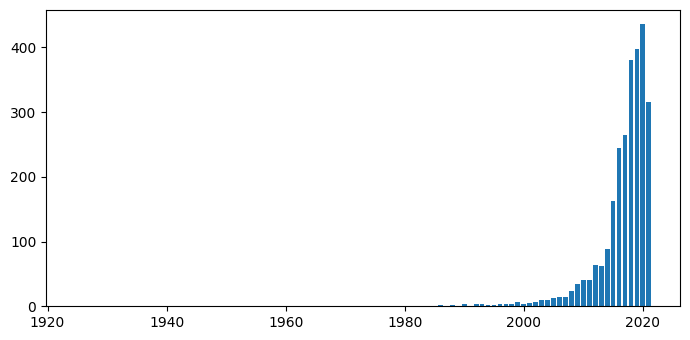

In [ ]:
tv_shows_year_count_df = tv_shows_year_count_df.reset_index()
plt.bar(tv_shows_year_count_df.release_year, tv_shows_year_count_df.duration, label='TV Shows')
plt.show()

### Plot movies mean durations per year

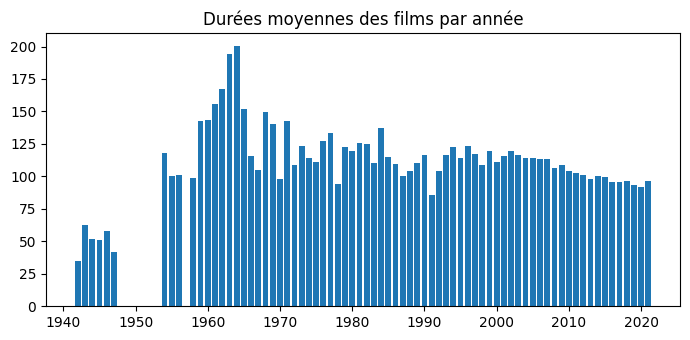

In [ ]:
movies_year_mean_df = movies_year_mean_df.reset_index()
plt.bar(movies_year_mean_df.release_year, movies_year_mean_df.duration, label='Movies')
plt.title('Durées moyennes des films par année')
plt.show()

### Plot movies duration count per  year

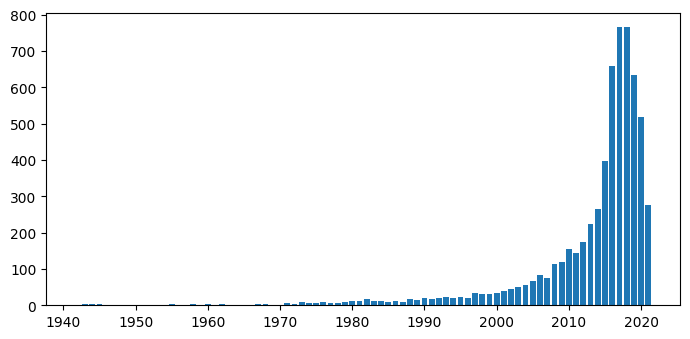

In [ ]:
movies_year_count_df = movies_year_count_df.reset_index()
plt.bar(movies_year_count_df.release_year, movies_year_count_df.duration, label='Movies')
plt.savefig("./chart_images/cat.png")
plt.show()